### 01. Import Library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
#import sys
#sys.path.append('/content/drive/My Drive/Colab Notebooks/')

### 02. Load Dataset

In [3]:
#dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Vehicle Insurance Claim Fraud Detection/fraud_oracle.csv')
dataset = pd.read_csv('fraud_oracle.csv')

In [4]:
dataset

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [10]:
dataset['AddressChange_Claim'].value_counts()

AddressChange_Claim
no change         14324
4 to 8 years        631
2 to 3 years        291
1 year              170
under 6 months        4
Name: count, dtype: int64

### 03. EDA

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [12]:
dataset.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [13]:
dataset.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [14]:
dataset.duplicated().sum()

np.int64(0)

In [15]:
pd.set_option('display.max.column', None)

In [16]:
dataset.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [17]:
# Rename the target feature
dataset.rename(columns={'FraudFound_P': 'Target'}, inplace=True)

In [18]:
# Check Value Counts
dataset['Target'].value_counts()

Target
0    14497
1      923
Name: count, dtype: int64

In [19]:
dataset['PastNumberOfClaims'].value_counts()

PastNumberOfClaims
2 to 4         5485
none           4352
1              3573
more than 4    2010
Name: count, dtype: int64

In [20]:
dataset['AgeOfVehicle'].value_counts()

AgeOfVehicle
7 years        5807
more than 7    3981
6 years        3448
5 years        1357
new             373
4 years         229
3 years         152
2 years          73
Name: count, dtype: int64

In [21]:
dataset['AgeOfPolicyHolder'].value_counts()

AgeOfPolicyHolder
31 to 35    5593
36 to 40    4043
41 to 50    2828
51 to 65    1392
26 to 30     613
over 65      508
16 to 17     320
21 to 25     108
18 to 20      15
Name: count, dtype: int64

In [22]:
dataset['Fault'].value_counts()

Fault
Policy Holder    11230
Third Party       4190
Name: count, dtype: int64

In [23]:
dataset['AgentType'].value_counts()

AgentType
External    15179
Internal      241
Name: count, dtype: int64

In [24]:
dataset['WitnessPresent'].value_counts()

WitnessPresent
No     15333
Yes       87
Name: count, dtype: int64

In [25]:
dataset['PoliceReportFiled'].value_counts()

PoliceReportFiled
No     14992
Yes      428
Name: count, dtype: int64

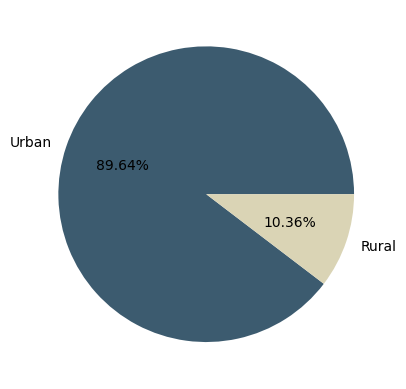

In [26]:
# Accident Area
plt.pie(
    dataset['AccidentArea'].value_counts(),
    labels=['Urban', 'Rural'],
    autopct='%.02f%%',
    colors=['#3C5B6F', '#DAD4B5']
)
plt.show()

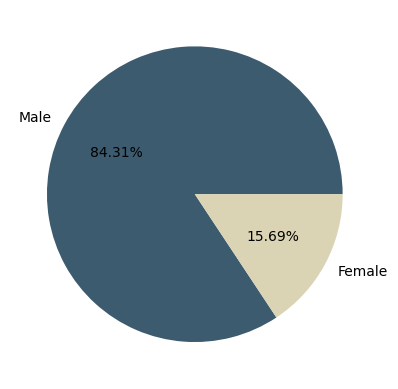

In [27]:
# Gender
plt.pie(
    dataset['Sex'].value_counts(),
    labels=['Male', 'Female'],
    autopct='%.02f%%',
    colors=['#3C5B6F', '#DAD4B5']
)
plt.show()

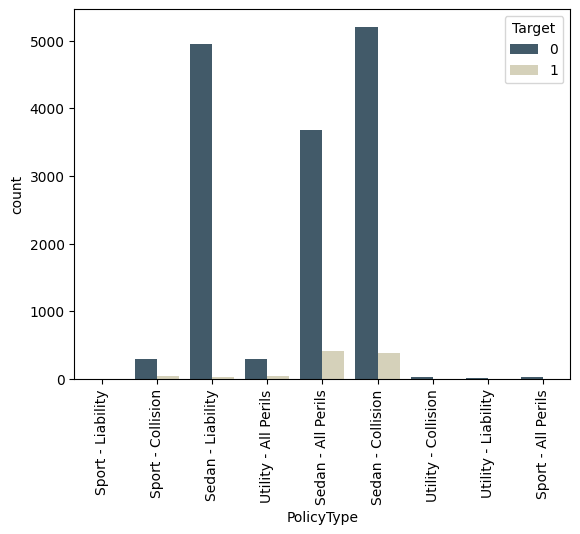

In [28]:
# Policy Type
sns.countplot(dataset,
              x = 'PolicyType',
              hue = 'Target',
              palette=['#3C5B6F', '#DAD4B5'])
plt.xticks(rotation = 90)
plt.show()

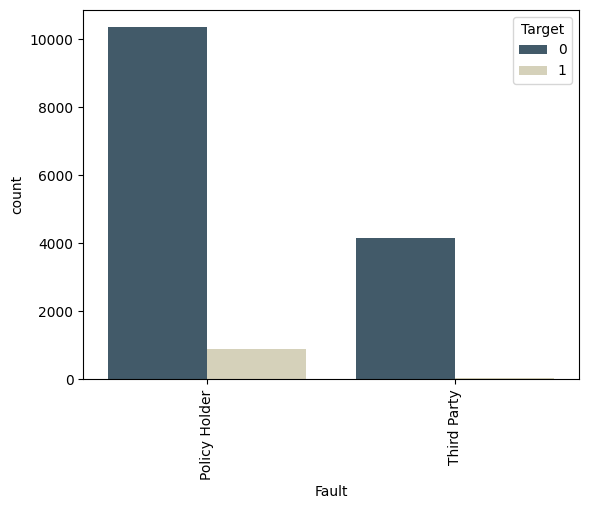

In [29]:
# Fault
sns.countplot(dataset,
              x = 'Fault',
              hue = 'Target',
              palette=['#3C5B6F', '#DAD4B5'])
plt.xticks(rotation = 90)
plt.show()

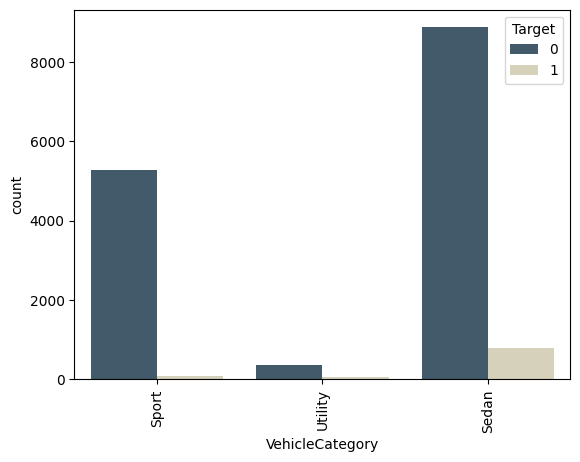

In [30]:
# Vehicle Category
sns.countplot(dataset,
              x = 'VehicleCategory',
              hue = 'Target',
              palette=['#3C5B6F', '#DAD4B5'])
plt.xticks(rotation = 90)
plt.show()

C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_9664\3384511694.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset,


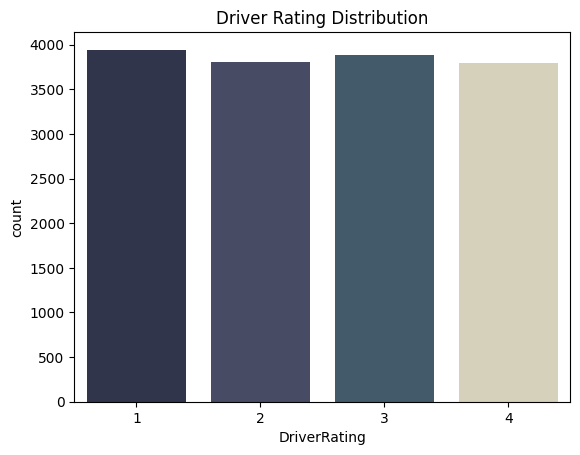

In [31]:
# Driver Ratings
sns.countplot(data=dataset,
              x='DriverRating',
              palette=['#2D3250', '#424769', '#3C5B6F', '#DAD4B5'])


plt.title('Driver Rating Distribution')
plt.show()

In [32]:
dataset['DriverRating'].value_counts()

DriverRating
1    3944
3    3884
2    3801
4    3791
Name: count, dtype: int64

In [33]:
dataset['VehiclePrice'].value_counts()

VehiclePrice
20000 to 29000     8079
30000 to 39000     3533
more than 69000    2164
less than 20000    1096
40000 to 59000      461
60000 to 69000       87
Name: count, dtype: int64

In [34]:
# Grouping DataFrame columns
num_cols = dataset.select_dtypes(include = 'number').columns.tolist()
num_cols.remove('Year')

datetime_cols = ['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed','Year']
temp = dataset.select_dtypes(exclude = 'number').columns.tolist()

cat_cols = [col for col in temp if col not in datetime_cols]
num_cols

['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'Target',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating']

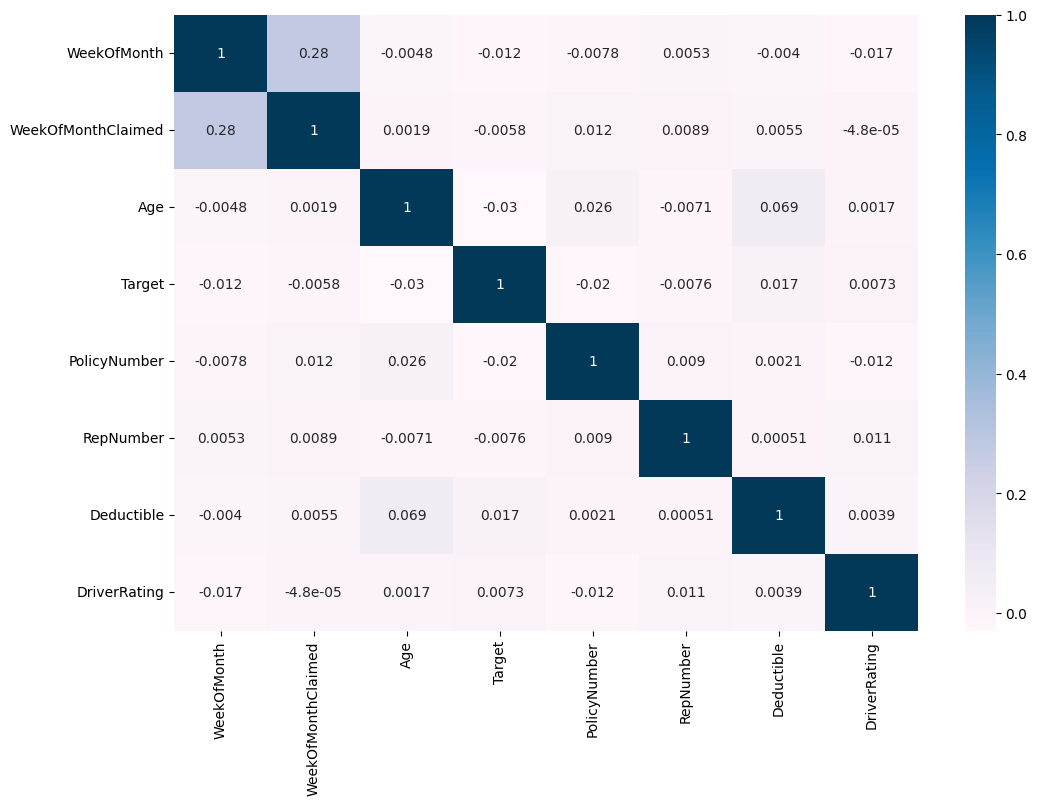

In [35]:
# Correlation Matrix (Number Columns)
plt.figure(figsize=(12, 8))
sns.heatmap(
    dataset[num_cols].corr(),
    annot=True,
    cmap='PuBu'
)
plt.show()

In [36]:
# Identify Columns Relationship
from scipy.stats import chi2_contingency
least_related_cols = []
for col in cat_cols:
    cross_tab = pd.crosstab(dataset['Target'],dataset[col])
    stat,p_value,dof,expected = chi2_contingency(cross_tab)
    if p_value>0.05:
        least_related_cols.append(col)
    print(f"Chi-square Test for {col} vs Target:")
    print(f"Chi-square Statistic: {stat}")
    print(f"P-value: {p_value}")
    print("")
print("Columns that do not have significant relationship with the target variable are:")
print(least_related_cols)

Chi-square Test for Make vs Target:
Chi-square Statistic: 59.80999900179377
P-value: 2.195889371054876e-06

Chi-square Test for AccidentArea vs Target:
Chi-square Statistic: 16.84430956342229
P-value: 4.057480255422561e-05

Chi-square Test for Sex vs Target:
Chi-square Statistic: 13.489893718354447
P-value: 0.00023985178051231308

Chi-square Test for MaritalStatus vs Target:
Chi-square Statistic: 1.0135120431478972
P-value: 0.7979824874413766

Chi-square Test for Fault vs Target:
Chi-square Statistic: 264.9538238111968
P-value: 1.4280361401294865e-59

Chi-square Test for PolicyType vs Target:
Chi-square Statistic: 437.40187033464593
P-value: 1.848256360377509e-89

Chi-square Test for VehicleCategory vs Target:
Chi-square Statistic: 290.9421399073752
P-value: 6.648398495577013e-64

Chi-square Test for VehiclePrice vs Target:
Chi-square Statistic: 67.768295203649
P-value: 2.983597513664722e-13

Chi-square Test for Days_Policy_Accident vs Target:
Chi-square Statistic: 11.57160700948295
P-

In [37]:
columns_to_drop = ['MaritalStatus', 'Days_Policy_Claim', 'PoliceReportFiled', 'WitnessPresent', 'NumberOfCars', 'PolicyNumber']

dataset = dataset.drop(columns=columns_to_drop)

## 04. Modelling

In [38]:
# Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['Month'] = encoder.fit_transform(dataset['Month'])
dataset['DayOfWeek'] = encoder.fit_transform(dataset['DayOfWeek'])
dataset['Make'] = encoder.fit_transform(dataset['Make'])
dataset['AccidentArea'] = encoder.fit_transform(dataset['AccidentArea'])
dataset['DayOfWeekClaimed'] = encoder.fit_transform(dataset['DayOfWeekClaimed'])
dataset['MonthClaimed'] = encoder.fit_transform(dataset['MonthClaimed'])
dataset['Sex'] = encoder.fit_transform(dataset['Sex'])
dataset['Fault'] = encoder.fit_transform(dataset['Fault'])
dataset['PolicyType'] = encoder.fit_transform(dataset['PolicyType'])
dataset['VehicleCategory'] = encoder.fit_transform(dataset['VehicleCategory'])
dataset['VehiclePrice'] = encoder.fit_transform(dataset['VehiclePrice'])
dataset['Days_Policy_Accident'] = encoder.fit_transform(dataset['Days_Policy_Accident'])
dataset['AgeOfVehicle'] = encoder.fit_transform(dataset['AgeOfVehicle'])
dataset['AgeOfPolicyHolder'] = encoder.fit_transform(dataset['AgeOfPolicyHolder'])
dataset['PastNumberOfClaims'] = encoder.fit_transform(dataset['PastNumberOfClaims'])
dataset['NumberOfSuppliments'] = encoder.fit_transform(dataset['NumberOfSuppliments'])
dataset['AddressChange_Claim'] = encoder.fit_transform(dataset['AddressChange_Claim'])
dataset['BasePolicy'] = encoder.fit_transform(dataset['BasePolicy'])
dataset['AgentType'] = encoder.fit_transform(dataset['AgentType'])

In [39]:
dataset.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,Target,RepNumber,Deductible,DriverRating,Days_Policy_Accident,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,AgentType,NumberOfSuppliments,AddressChange_Claim,Year,BasePolicy
0,2,5,6,6,1,6,5,1,0,21,0,5,1,5,0,12,300,1,3,3,1,3,0,3,0,1994,2
1,4,3,6,6,1,2,5,4,1,34,0,4,1,5,0,15,400,4,3,3,4,4,0,3,3,1994,1
2,10,5,0,6,1,5,10,2,1,47,0,4,1,5,0,7,400,3,3,0,5,6,0,3,3,1994,1
3,6,2,2,17,0,1,6,1,1,65,1,2,1,0,0,4,400,2,3,0,6,7,0,2,3,1994,2
4,4,5,1,6,1,6,4,2,0,27,1,4,1,5,0,3,400,1,3,3,3,4,0,3,3,1994,1


In [40]:
# Split Train and Test data
X = dataset.drop(['Target'],axis = 1)
y = dataset['Target']

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Split Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

selector = SelectKBest(score_func=f_classif, k=10) 
X_new = selector.fit_transform(X_train, y_train)

selected_feature_indices = selector.get_support(indices=True)

selected_feature_names = X.columns[selected_feature_indices]

# Selected Feature
X_filtered = X[selected_feature_names]

# Result
print("Selected Feature:")
print(selected_feature_names)

Selected Feature:
Index(['AccidentArea', 'Sex', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'AgeOfPolicyHolder', 'AddressChange_Claim',
       'BasePolicy'],
      dtype='object')


In [42]:
X_filtered

,AccidentArea,Sex,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,AgeOfPolicyHolder,AddressChange_Claim,BasePolicy
0,1,0,21,0,5,1,5,3,0,2
1,1,1,34,0,4,1,5,4,3,1
2,1,1,47,0,4,1,5,6,3,1
3,0,1,65,1,2,1,0,7,3,2
4,1,0,27,1,4,1,5,4,3,1
...,...,...,...,...,...,...,...,...,...,...
15415,1,1,35,0,1,0,0,4,3,1
15416,1,1,30,0,2,1,1,4,3,2
15417,0,1,24,0,1,0,0,3,3,1
15418,1,0,34,1,0,0,0,4,3,0


In [43]:
# Add the target feature from y_resampled to pca_df
fb_combined_df = pd.concat([X_filtered, y], axis = 1)

# Result
print("\n New DataFrame:")
fb_combined_df


 New DataFrame:


,AccidentArea,Sex,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,AgeOfPolicyHolder,AddressChange_Claim,BasePolicy,Target
0,1,0,21,0,5,1,5,3,0,2,0
1,1,1,34,0,4,1,5,4,3,1,0
2,1,1,47,0,4,1,5,6,3,1,0
3,0,1,65,1,2,1,0,7,3,2,0
4,1,0,27,1,4,1,5,4,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
15415,1,1,35,0,1,0,0,4,3,1,1
15416,1,1,30,0,2,1,1,4,3,2,0
15417,0,1,24,0,1,0,0,3,3,1,1
15418,1,0,34,1,0,0,0,4,3,0,0


In [44]:
dataset['Age'].value_counts().sort_values(ascending=True)

Age
17      6
16      9
79     20
70     27
20     28
     ... 
28    560
35    569
34    573
33    574
30    596
Name: count, Length: 66, dtype: int64

In [45]:
X = fb_combined_df.drop(columns=['Target'])
y = fb_combined_df['Target']

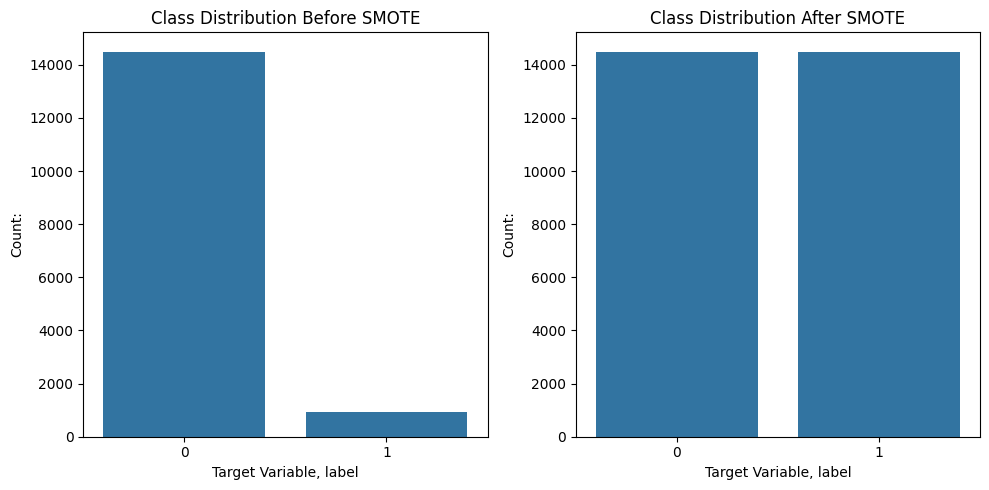

In [46]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Before SMOTE
sns.countplot(x=y, ax=axes[0])
axes[0].set_title('Class Distribution Before SMOTE')
axes[0].set_xlabel('Target Variable, label')
axes[0].set_ylabel('Count:')

# After SMOTE
sns.countplot(x=y_resampled, ax=axes[1])
axes[1].set_title('Class Distribution After SMOTE')
axes[1].set_xlabel('Target Variable, label')
axes[1].set_ylabel('Count:')

plt.tight_layout()
plt.show()

In [47]:
# Split Training and Testing Data
#X = X
#y = y

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=42)

In [48]:
# Building and evaluating models
def evaluate_model(true, predicted, is_regression=False):
    if is_regression:
        mae = mean_absolute_error(true, predicted)
        mse = mean_squared_error(true, predicted)
        rmse = np.sqrt(mean_squared_error(true, predicted))
        r2_square = r2_score(true, predicted)
        return mae, rmse, r2_square
    else:
        accuracy = accuracy_score(true, predicted)
        precision = precision_score(true, predicted)
        recall = recall_score(true, predicted)
        f1 = f1_score(true, predicted)
        roc_auc = roc_auc_score(true, predicted)
        return accuracy, precision, recall, f1, roc_auc

In [49]:
# Model Comparison
models = {
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Naive Bayes Classifier": GaussianNB()
}

model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    accuracy, precision, recall, f1, roc_auc=evaluate_model(y_test, y_test_pred, is_regression=False)


    print(model_name)
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy))
    print("- Precision: {:.4f}".format(precision))
    print("- Recall: {:.4f}".format(recall))
    print("- F1 Score: {:.4f}".format(f1))
    print("- ROC AUC Score: {:.4f}".format(roc_auc))
    print('='*35)
    print('\n')

    model_list.append(model_name)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)

Logistic Regression
Model performance for Test set
- Accuracy: 0.7720
- Precision: 0.6991
- Recall: 0.9552
- F1 Score: 0.8073
- ROC AUC Score: 0.7720


Gradient Boosting Classifier
Model performance for Test set
- Accuracy: 0.7936
- Precision: 0.7167
- Recall: 0.9710
- F1 Score: 0.8247
- ROC AUC Score: 0.7936


XGBoost Classifier
Model performance for Test set
- Accuracy: 0.8391
- Precision: 0.7814
- Recall: 0.9417
- F1 Score: 0.8541
- ROC AUC Score: 0.8391


K-Neighbors Classifier
Model performance for Test set
- Accuracy: 0.8098
- Precision: 0.7745
- Recall: 0.8741
- F1 Score: 0.8213
- ROC AUC Score: 0.8098




e:\FGA_DTS_BIG Data with Python\Machine Learning Project\Vehicle Insurance Claim Fraud Detection\.venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier
Model performance for Test set
- Accuracy: 0.7770
- Precision: 0.7091
- Recall: 0.9397
- F1 Score: 0.8082
- ROC AUC Score: 0.7770


Naive Bayes Classifier
Model performance for Test set
- Accuracy: 0.7608
- Precision: 0.6923
- Recall: 0.9390
- F1 Score: 0.7970
- ROC AUC Score: 0.7608




XGBoost Classifier has been selected as the model with the best accuracy of 84%.

In [50]:
# Evaluate result with classification report
from sklearn.metrics import classification_report,confusion_matrix
model=XGBClassifier()
clf=model.fit(X_train, y_train)
pred=clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      2899
           1       0.78      0.94      0.85      2900

    accuracy                           0.84      5799
   macro avg       0.85      0.84      0.84      5799
weighted avg       0.85      0.84      0.84      5799



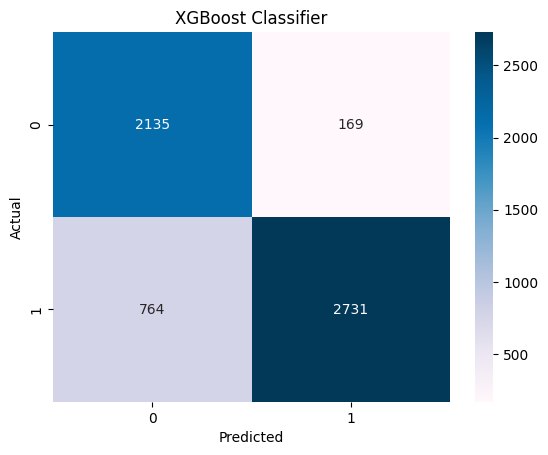

In [51]:
# Confusion Matrix
sns.heatmap(confusion_matrix(pred,y_test),annot = True,fmt = "d", cmap = 'PuBu')
plt.title("XGBoost Classifier")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# save model
import pickle
from sklearn.preprocessing import StandardScaler


with open("xgb_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

In [ ]:
# load model
with open("xgb_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

In [ ]:
# inference model
new_data = [1, 0, 21, 0, 5, 1, 5, 3, 0, 2]

model.predict([new_data])

In [ ]:
fb_combined_df.to_csv('clean_data.csv', index=False)

In [ ]:
fb_combined_df.head()